In this notebook we will work on **corner detection** with algorithm, proposed by **Chris Harris & Mike Stephens**.<br>
We will detect corner with open-cv library in "chess" image.
<br>
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

### Libraries import

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline

Let's **visualize an image and take a look at corners in it**. 

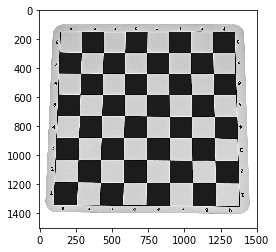

In [37]:
img = cv2.imread('images/chess.jpg')
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

### Corner detection 

Since corner detection primarily **depends on change in intensity** (remember, we have  magnitude $\rho$ - the strenght of intensity), we can convert an image to grayscale. <br>
Note, that we need to **convert image matrix (ints) into float**, since Harris detector uses floats. <br>
We are going to apply `cv2.cornerHarris`, that takes following params:  <br>
- **grayscale image**;
- the **size of the neighbourhood** to identify potential corners. E.g. **2** means pixel matrix 2x2. <br>
  Since in our example squares marked pretty well, matrix 2x2 should work properly. 
- **Sobel kernel size** (so-called Sobel gradient or derivative). E.g. **3** means 3x3 filter - typical size.
- **constant** value - helps to determine which points are considered as corners. The **lower value** the **more corners** will be detected. Typical value is **0.04**. 

In [38]:
gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

Result should return an image where **bright points are corners and non-corners are darker pixels**. 

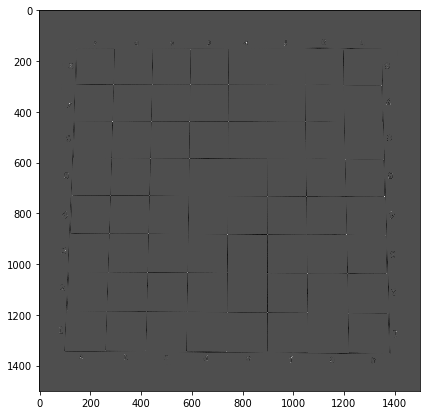

In [39]:
fig = plt.figure(figsize = (18,7))
plt.imshow(dst, cmap = 'gray')

On this image it's actually hard to see bright point.<br> So, we are going to perform one more opetrations to **dialet them**. 
<br>
Let's apply `cv2.dialet` function to dialet thesew corners. Params are: <br>
- Harris corner resulted image;
- Structuring element, usually **None**.

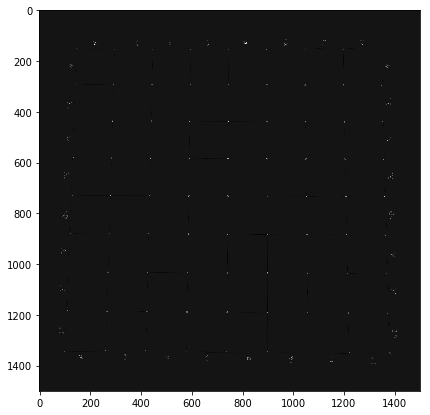

In [40]:
dst = cv2.dilate(dst, None)

fig = plt.figure(figsize = (18,7))
plt.imshow(dst, cmap = "gray")

Now we can see the corner pretty well as the brightest points. 

Last step will be to display the **brightest corners**.

### Select and display the strong corners 

To select the strongest corners we need to define the **threshold**.<br>
This value may vary depending on the image. <br>
Let's take a small value - **10% of maximum corner detected image result**. 

We will iterate over the values in corner detection matrix along the rows (i) and columns (j) and **check if the value is larger than our threshold**, we will draw this on our image. <br>
Use `cv2.circle()` for this to draw gree circle on strong corner. 

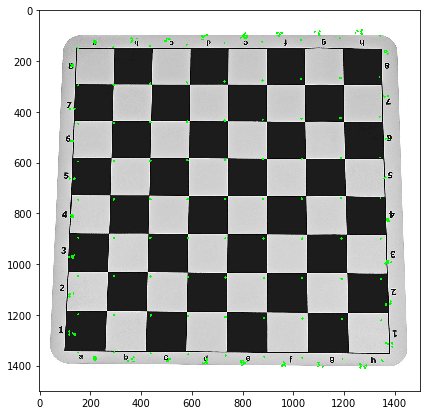

In [45]:
threshold = 0.1 * dst.max()

corner_image = np.copy(img_copy)

for i in range(0, dst.shape[0]):
    for j in range(0, dst.shape[1]):
        # one value to represent if clause
        if(dst[i,j] > threshold):
            # 2 - radius, 1 - thikness
            cv2.circle(corner_image, (i,j), 2, (0,255,0), 1)
        
fig = plt.figure(figsize = (18,7))
plt.imshow(corner_image)

Now, we can see plenty of small green circles, detecting the corners on image. <br>
Note, if we **decrease the value of threshold even more corners will be detected**. 

Corners can be used to understand the information about chess board dimension, as an example. 